In [2]:
import pandas as pd 
import numpy as np

file_path = '../data/imdb_top_1000.csv'

try:
    data_frame = pd.read_csv(file_path)
    print("Dados carregados! As 5 primeiras linhas são: ")
    display(data_frame.head())
except FileNotFoundError: 
    print("Falha!!")


print("informações gerais: ")
data_frame.info()

print("Estatística das tabelas: ")
display(data_frame.describe())

data_frame['Runtime'] = data_frame['Runtime'].str.replace(' min', '').astype(int)
print("Coluna Runtime limpa e convertida para inteiros")

data_frame['Gross'] = data_frame['Gross'].str.replace(',', '', regex=False)
data_frame['Gross'] = pd.to_numeric(data_frame['Gross'], errors='coerce')
print("Coluna Gross limpa e convertida para float.")

mode_certificate = data_frame['Certificate'].mode()[0]
data_frame['Certificate'].fillna(mode_certificate, inplace=True)
print(f"Valores nulos de Certificate preenchidos com a moda: '{mode_certificate}'")

mediana_metascore = data_frame['Meta_score'].median()
data_frame['Meta_score'].fillna(mediana_metascore, inplace=True)
print(f"Valores nulos de 'Meta_score' preenchidos com a mediana: {mediana_metascore}")

print("\nVerificando as informações do DataFrame depois da limpeza:")
data_frame.info()

print("Resumo estatístico após a limpeza:")
display(data_frame.describe())


Dados carregados! As 5 primeiras linhas são: 


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


informações gerais: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Estatística das t

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


Coluna Runtime limpa e convertida para inteiros
Coluna Gross limpa e convertida para float.
Valores nulos de Certificate preenchidos com a moda: 'U'
Valores nulos de 'Meta_score' preenchidos com a mediana: 79.0

Verificando as informações do DataFrame depois da limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Sta

C:\Users\PC\AppData\Local\Temp\ipykernel_4052\520069877.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['Certificate'].fillna(mode_certificate, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_4052\520069877.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,Unnamed: 0,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,8.300000e+02
mean,500.000000,122.871872,7.947948,78.131131,2.716214e+05,6.807319e+07
std,288.530761,28.101227,0.272290,11.373766,3.209126e+05,1.098134e+08
min,1.000000,45.000000,7.600000,28.000000,2.508800e+04,3.600000e+01
25%,250.500000,103.000000,7.700000,72.000000,5.547150e+04,3.245338e+06
50%,500.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,749.500000,137.000000,8.100000,85.500000,3.731675e+05,8.087634e+07
max,999.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


C:\Users\PC\AppData\Local\Temp\ipykernel_4052\2685739822.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gross_by_genre.values, y=avg_gross_by_genre.index, palette='plasma', orient='h')


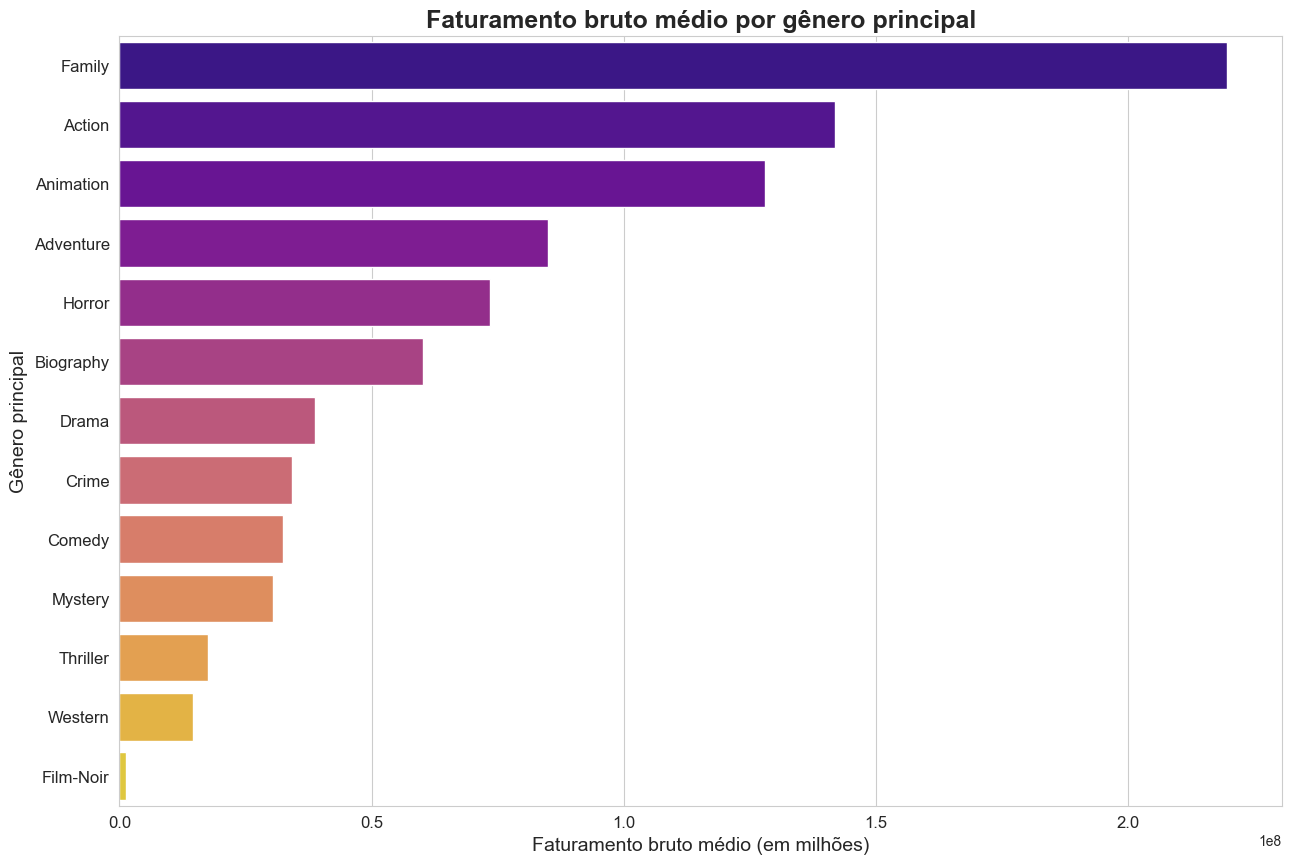

--- Top 10 riretores por faturamento médio (mais de 2 filmes na lista) ---


,Avg_Gross,Avg_Rating,Movie_Count
Director,,,
Anthony Russo,5.512599e+08,8.075000,4
J.J. Abrams,4.743903e+08,7.833333,3
James Cameron,3.496473e+08,8.080000,5
David Yates,3.263179e+08,7.800000,3
Peter Jackson,3.194625e+08,8.400000,5
Pete Docter,3.131274e+08,8.125000,4
Brad Bird,2.749069e+08,7.900000,4
Christopher Nolan,2.421818e+08,8.462500,8
Robert Zemeckis,2.098893e+08,8.120000,5



--- Top 10 atores principais por faturamento médio (mais de 2 filmes na lista) ---


,Avg_Gross,Avg_Rating,Movie_Count
Star1,,,
Joe Russo,5.512599e+08,8.075000,4
Robert Downey Jr.,3.835734e+08,7.833333,3
Elijah Wood,3.453140e+08,8.800000,3
Mark Hamill,3.074469e+08,8.533333,3
Daniel Radcliffe,3.059835e+08,7.766667,6
Tom Hanks,2.108418e+08,8.081818,11
Leonardo DiCaprio,2.085913e+08,8.133333,9
John Musker,1.925502e+08,7.733333,3
Matt Damon,1.874427e+08,7.950000,4


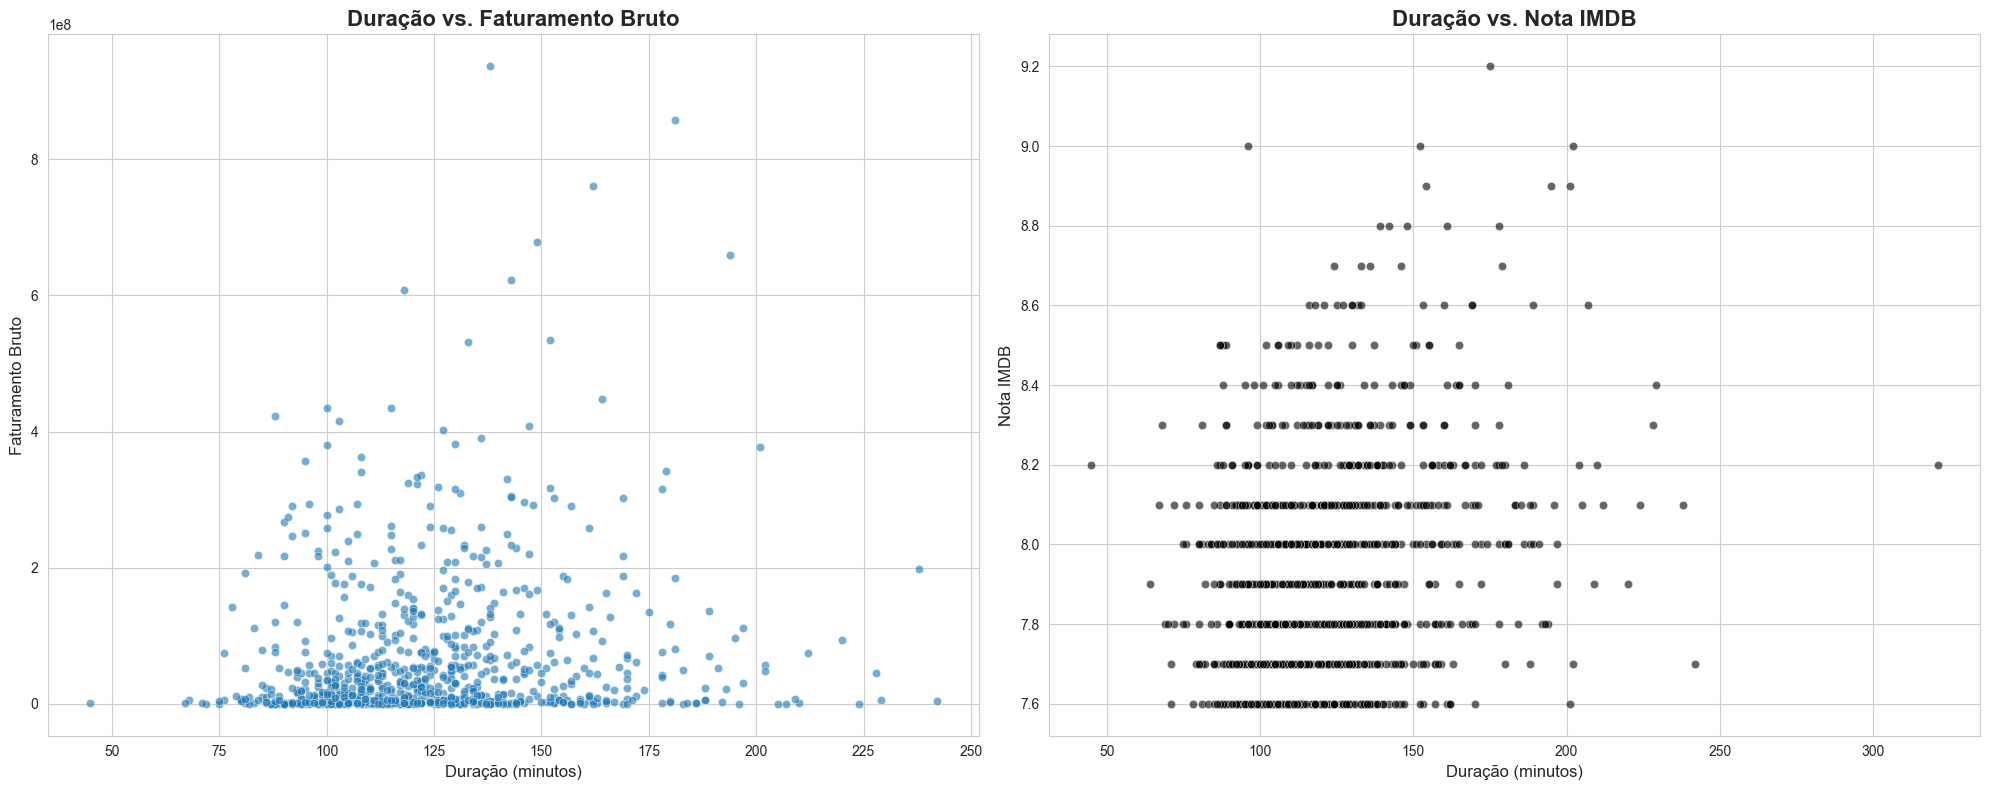

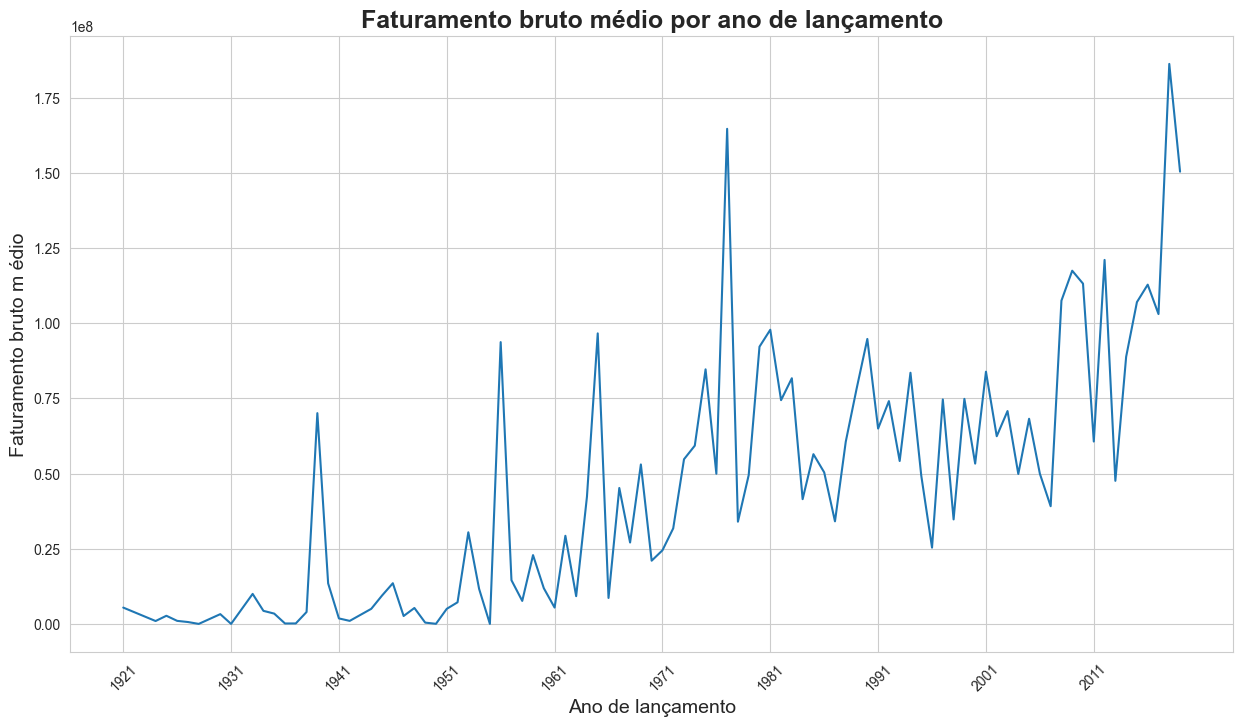

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

data_frame['Main_Genre'] = data_frame['Genre'].apply(lambda x: x.split(',')[0])
avg_gross_by_genre = data_frame.groupby('Main_Genre')['Gross'].mean().dropna().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x=avg_gross_by_genre.values, y=avg_gross_by_genre.index, palette='plasma', orient='h')

plt.title('Faturamento bruto médio por gênero principal', fontsize=18, fontweight='bold')
plt.xlabel('Faturamento bruto médio (em milhões)', fontsize=14)
plt.ylabel('Gênero principal', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

directors_count = data_frame['Director'].value_counts()
top_directors_list = directors_count[directors_count > 2].index

top_directors = data_frame[data_frame['Director'].isin(top_directors_list)].groupby('Director').agg(
    Avg_Gross=('Gross', 'mean'),
    Avg_Rating=('IMDB_Rating', 'mean'),
    Movie_Count=('Series_Title', 'count')
).sort_values(by='Avg_Gross', ascending=False).head(10)

print("--- Top 10 riretores por faturamento médio (mais de 2 filmes na lista) ---")
display(top_directors)

stars_count = data_frame['Star1'].value_counts()
top_stars_list = stars_count[stars_count > 2].index

top_stars = data_frame[data_frame['Star1'].isin(top_stars_list)].groupby('Star1').agg(
    Avg_Gross=('Gross', 'mean'),
    Avg_Rating=('IMDB_Rating', 'mean'),
    Movie_Count=('Series_Title', 'count')
).sort_values(by='Avg_Gross', ascending=False).head(10)

print("\n--- Top 10 atores principais por faturamento médio (mais de 2 filmes na lista) ---")
display(top_stars)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(ax=axes[0], data=data_frame, x='Runtime', y='Gross', alpha=0.6)
axes[0].set_title('Duração vs. Faturamento Bruto', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Duração (minutos)', fontsize=12)
axes[0].set_ylabel('Faturamento Bruto', fontsize=12)

sns.scatterplot(ax=axes[1], data=data_frame, x='Runtime', y='IMDB_Rating', alpha=0.6, color='black')
axes[1].set_title('Duração vs. Nota IMDB', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Duração (minutos)', fontsize=12)
axes[1].set_ylabel('Nota IMDB', fontsize=12)

plt.tight_layout() 
plt.show()

data_frame['Released_Year'] = pd.to_numeric(data_frame['Released_Year'], errors='coerce')

data_frame.dropna(subset=['Released_Year'], inplace=True)

data_frame['Released_Year'] = data_frame['Released_Year'].astype(int)


avg_gross_by_year = data_frame.groupby('Released_Year')['Gross'].mean().dropna()

plt.figure(figsize=(15, 8))
sns.lineplot(x=avg_gross_by_year.index, y=avg_gross_by_year.values)

plt.title('Faturamento bruto médio por ano de lançamento', fontsize=18, fontweight='bold')
plt.xlabel('Ano de lançamento', fontsize=14)
plt.ylabel('Faturamento bruto m édio', fontsize=14)

plt.xticks(ticks=np.arange(min(avg_gross_by_year.index), max(avg_gross_by_year.index)+1, 10), rotation=45)

plt.show()